In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('../data/toxic-comments/train_preprocessed.csv')

In [4]:
df.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,identity_hate,insult,obscene,severe_toxic,threat,toxic,toxicity
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.008805,0.049364,0.052948,0.009996,0.002996,0.095844,0.219952
std,0.093420,0.216627,0.223931,0.099477,0.054650,0.294379,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [6]:
len(df)

159571

In [7]:
df['toxic']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
159566    0.0
159567    0.0
159568    0.0
159569    0.0
159570    0.0
Name: toxic, Length: 159571, dtype: float64

In [8]:
df = df.drop('set', axis=1)

In [9]:
df = df.drop('id', axis=1)

In [10]:
df.head()

,comment_text,identity_hate,insult,obscene,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
comments = df['comment_text']
is_toxic = df['toxicity']

In [12]:
comments[:2]

0    explanation why the edits made under my userna...
1    d aww  he matches this background colour i m s...
Name: comment_text, dtype: object

In [13]:
is_toxic[:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    4.0
7    0.0
8    0.0
9    0.0
Name: toxicity, dtype: float64

In [14]:
labels = []

for if_toxic in is_toxic:
    if if_toxic > 0:
        labels.append(1.0)
    else:
        labels.append(0.0)

In [15]:
comments = np.array(comments)
labels = np.array(labels)

In [16]:
print(len(comments))

159571


In [17]:
160000 - 10000

150000

In [18]:
training_comments = comments[:150000]
testing_comments = comments[150000:]

training_labels = labels[:150000]
testing_labels = labels[150000:]

In [19]:
len(training_comments)

150000

In [20]:
labels[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [21]:
vocab_size = 100000
embedding_dim = 16
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [22]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_comments)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_comments)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_comments)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, LSTM, Bidirectional, Conv1D

In [25]:
model = Sequential()

# ----------------------------------------------------------------------
# model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

# model.add(Bidirectional(LSTM(32, return_sequences=True)))
# model.add(Bidirectional(LSTM(32)))

# model.add(Dense(24, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# ----------------------------------------------------------------------

model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

model.add(Conv1D(128, 5, activation='relu'))

model.add(GlobalAveragePooling1D())

model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# ----------------------------------------------------------------------

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 16)           1600000   
_________________________________________________________________
conv1d (Conv1D)              (None, 146, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,613,489
Trainable params: 1,613,489
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=0)

In [29]:
from tensorflow.test import is_gpu_available

In [30]:
is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [31]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1,callbacks=[early_stop])

Epoch 1/10
4688/4688 [==============================] - 111s 24ms/step - loss: 0.1334 - accuracy: 0.9543 - val_loss: 0.1040 - val_accuracy: 0.9612
Epoch 2/10
4688/4688 [==============================] - 109s 23ms/step - loss: 0.0828 - accuracy: 0.9692 - val_loss: 0.1057 - val_accuracy: 0.9624


In [32]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

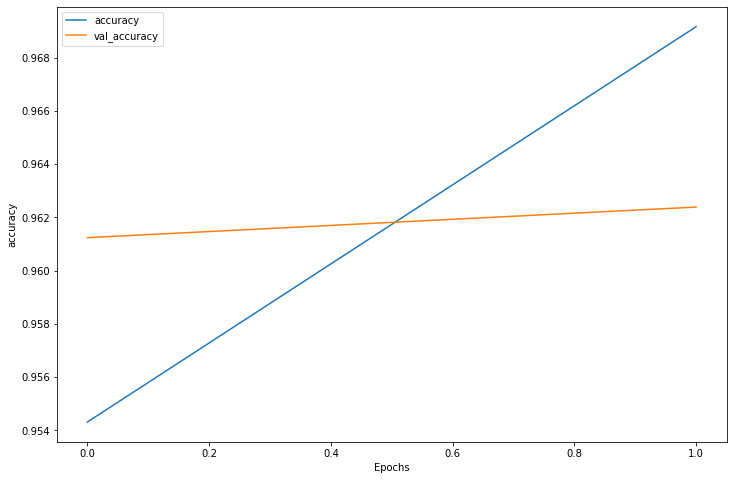

In [33]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "accuracy")

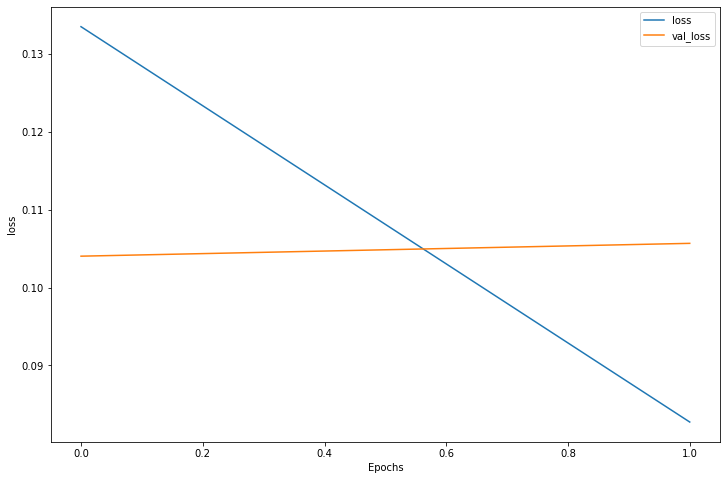

In [34]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "loss")

In [35]:
model.save('toxicity_model_conv.h5')

In [36]:
import pickle

with open('tokenizer_conv.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
sequences = tokenizer.texts_to_sequences(testing_comments)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
pred = np.round(pred)

In [39]:
pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [40]:
print(confusion_matrix(testing_labels, pred))
print('\n')
print(classification_report(testing_labels, pred))

[[8488  100]
 [ 260  723]]


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      8588
         1.0       0.88      0.74      0.80       983

    accuracy                           0.96      9571
   macro avg       0.92      0.86      0.89      9571
weighted avg       0.96      0.96      0.96      9571



In [41]:
index = 10
print(testing_comments[index])
print(testing_labels[index])

if you have a chance to read this you should instead of acting like a dick i have faith that you can do this the easiest way stop acting like a dick and btw happy new year to you 
1.0


In [42]:
index = 6
print(testing_comments[index])
print(testing_labels[index])

i d not call the dark knight  more like a crime drama  it had action scenes  but not that many 
0.0


In [43]:
sentence = ["I'm sorry can you please explain once again?"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

0.0


In [44]:
sentence = ["You should have made it yourself instead of acting like a jerk"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

1.0
